# ODE Function Approximation

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import e

In [16]:
def euler_solver(function, time, x0):
    y = np.zeros(len(time))   # reserve array space
    y[0] = x0

    for k in range(len(time)-1):
        y[k+1] = y[k] + (time[1]-time[0]) * function(y[k], time[k])

    return y

def heun_solver(function, time, x0):
    x = np.zeros(len(time))   # reserve array space
    x[0] = x0

    for k in range(len(time)-1):
        k_1 = x_derivative(x[k], time[k])
        x_2 = x[k] + TIMESTEP * k_1 
        k_2 = x_derivative(x_2, time[k+1])
        x_k2 = x[k] + 0.5 * TIMESTEP * (k_1 + k_2)

        x[k+1] = x[k] + (time[k+1] - time[k]) / 2 * ( function(x[k], time[k]) + function(x_k2, time[k+1]) )

    return x

def runge_kutta_solver(function, time, x0):
    x = np.zeros(len(time))   # reserve array space
    x[0] = x0

    for k in range(len(time)-1):
        k_1 = function(x[k], time[k])
        k_2 = function(x[k] + TIMESTEP/2*k_1, time[k] + TIMESTEP/2)
        k_3 = function(x[k] + TIMESTEP/2*k_2, time[k] + TIMESTEP/2)
        k_4 = function(x[k] + TIMESTEP*k_3, time[k] + TIMESTEP)

        x[k+1] = x[k] + TIMESTEP * ( k_1 + 2*k_2  + 2*k_3 + k_4 ) / 6

    return x

## Function 1

In [17]:
TIME_MAX = 2
TIMESTEP = 0.1
time = np.arange(0, TIME_MAX, TIMESTEP)

x0 = 2

def x_derivative(x, time):
    return (-2 * time * x**2) / (time**2 + 1)

def x_solved(time):
    return 1 / ( np.log(time**2 + 1) + 0.5 )

array([<Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>, <Axes: xlabel='time'>], dtype=object)

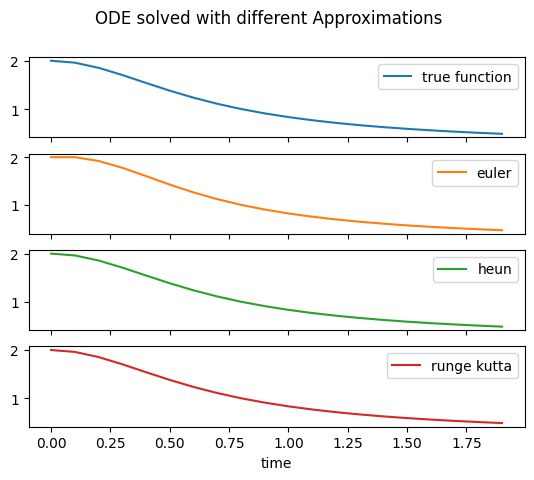

In [18]:
task1 = pd.DataFrame({
    "time"          : time, 
    "true function" : x_solved(time),
    "euler"         : euler_solver(x_derivative, time, x0),
    "heun"          : heun_solver(x_derivative, time, x0),
    "runge kutta"   : runge_kutta_solver(x_derivative, time, x0)
})
task1 = task1.set_index("time")

task1.plot(subplots=True, title="ODE solved with different Approximations")

## Function 2

In [26]:
TIME_MIN = -1.5
TIME_MAX = 2
def time(steps):
    return np.linspace(TIME_MIN, TIME_MAX, steps)

x0 = 2

def y_derivative(y, time):
    return y + time**3

def y_solved(time):
    return -np.power(time,3) - 3*np.square(time) - 6*time + 19/8 * np.power(e, 1.5 * time)

In [44]:
task2 = pd.DataFrame({
    "time"  :   time(50),
    "true function"  :   y_solved(time(50)),
})
task2 = task2.set_index("time")

test = pd.DataFrame({"time"  :   time(50)})
test = test.set_index("time")
for i in [2,4,8,16,32]:
    test.concat()
    test[f"{i} intervals"] = euler_solver(y_derivative, time(i+1), x0)
    

# task2.plot()

ValueError: Length of values (3) does not match length of index (50)

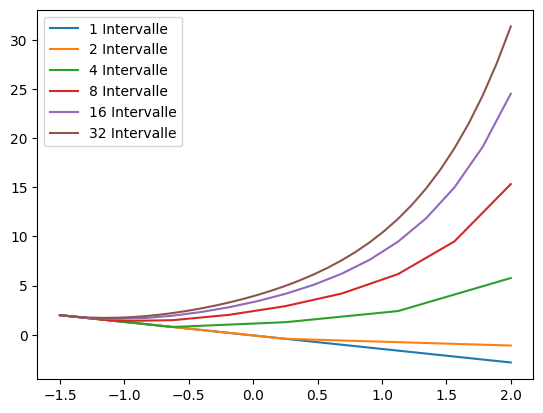

In [ ]:
def solve_for_step(steps):
    time = [TIME_MIN + k * (TIME_MAX - TIME_MIN) / steps for k in range(steps+1)]
    y = euler_solver(y_derivative, time, 2)
    return time, y

for i in range(6):
    steps = 2**i
    time, y = solve_for_step(steps)
    plt.plot(time, y, label=f"{steps} Intervalle")

plt.legend()
plt.show()

# !!! Lösung zip file scott